In [1]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(parallel)
library(ComplexHeatmap)
library(ggsci)
library(tidyverse)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cit

# Create the ratio plot using JI file

In [2]:
J_index <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/Jaccard_index/Jaccard_index_df_FvsM_each_celltype_padj0.1.csv")

In [3]:
#J_index

In [4]:
#Use DEG# in female/ DEG# (Female+Male-shared) on Y-axis and rank from high to low 
#     in X-axis in cell types that  have total DEGs # (f+M-s) > 10

In [5]:


J_index_modi <- J_index %>%
  mutate(Union = total_DEGs_female + total_DEGs_male - common_DEGs,  #(F+ M-shared)
         Ratio_union = total_DEGs_female / Union,
        Unique_F_ratio = (total_DEGs_female-common_DEGs)/ Union)
         

# Print the updated dataframe
head(J_index_modi)


,X,celltype,jaccard_similarity,total_DEGs_male,total_DEGs_female,common_DEGs,Union,Ratio_union,Unique_F_ratio
,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1,ASDC,NA,0,0,0,0,NaN,NaN
2,2,Activated memory B cell,NA,0,0,0,0,NaN,NaN
3,3,Adaptive NK cell,NA,0,0,0,0,NaN,NaN
4,4,BaEoMaP cell,NA,0,0,0,0,NaN,NaN
5,5,C1Q+ CD16 monocyte,0,0,1,0,1,1,1
6,6,CD4 MAIT,NA,0,0,0,0,NaN,NaN


In [6]:
new_JI <- J_index_modi %>% filter(J_index_modi$Union > 10)
head(new_JI)
length(new_JI$celltype)
# new_JI <- J_index_modi
# head(new_JI)

,X,celltype,jaccard_similarity,total_DEGs_male,total_DEGs_female,common_DEGs,Union,Ratio_union,Unique_F_ratio
,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,8,CD8aa,0.00000000,11,18,0,29,0.6206897,0.62068966
2,15,CM CD4 T cell,0.05454545,34,24,3,55,0.4363636,0.38181818
3,16,CM CD8 T cell,0.04736842,173,26,9,190,0.1368421,0.08947368
4,18,Core CD14 monocyte,0.00000000,10,64,0,74,0.8648649,0.86486486
5,20,Core memory B cell,0.03571429,16,13,1,28,0.4642857,0.42857143
6,22,Core naive CD4 T cell,0.16430020,307,267,81,493,0.5415822,0.37728195


[1] 17

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


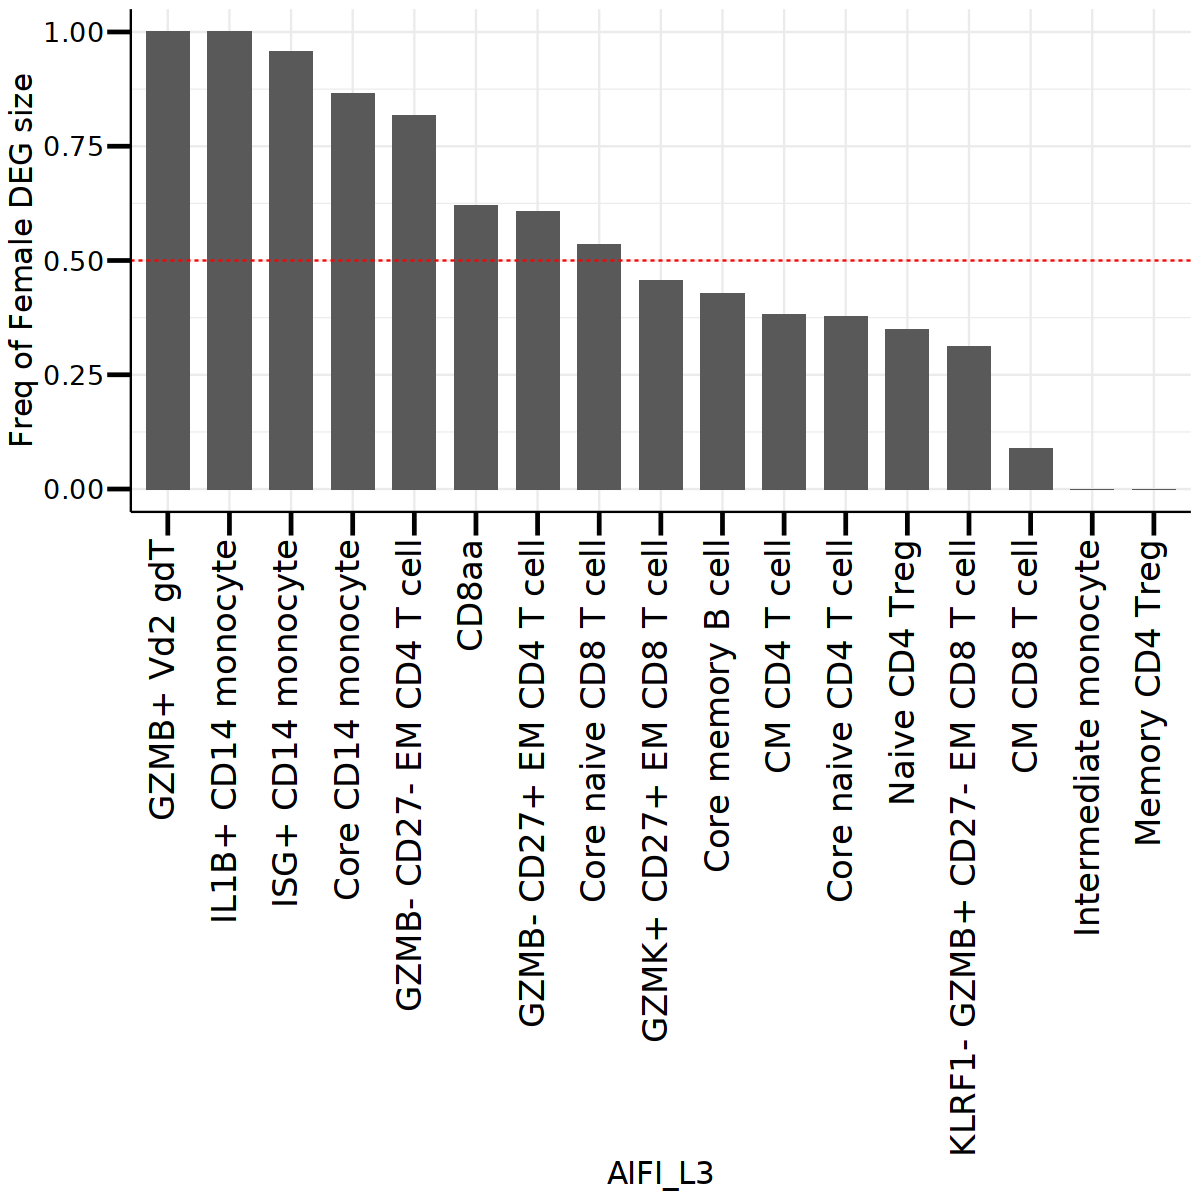

In [7]:
library(ggplot2)

# Assuming your dataframe is named df
# Replace df with the actual name of your dataframe if different

# Sort dataframe by Data_y in descending order
new_JI <- new_JI[order(-new_JI$Unique_F_ratio),]

# Convert cell_type to factor with levels arranged in descending order
new_JI$celltype <- factor(new_JI$celltype, levels = new_JI$celltype)

options(repr.plot.width = 10, repr.plot.height = 10)
# Create lollipop plot
lollipop_plot <- ggplot(new_JI, aes(x = celltype, y = Unique_F_ratio)) +
  geom_bar(stat = "identity", width = 0.7) +
  #geom_segment(aes(x = celltype, xend = celltype, y = 0, yend = Unique_F_ratio), color = "skyblue") +
  #geom_point(color = "blue", size = 3) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "red")+
  theme_minimal() + 
  #coord_flip() + 
  labs(x = "AIFI_L3", y = "Freq of Female DEG size") +
  theme(
    text = element_text(size = 16, color = "black"),  # Enlarge text
    axis.text.x = element_text(size = 20, angle = 90, hjust = 1, color = "black", vjust= 0.25),  # Rotate x-axis labels
    axis.text.y = element_text(size = 16, color = "black"),
    axis.title = element_text(size = 18, color = "black"),  # Enlarge axis titles
    legend.title = element_blank(),  # Remove legend title
    legend.text = element_text(size = 16),  # Enlarge legend text
    axis.ticks = element_line(color = 1,linewidth = 1),
    axis.line = element_line(colour = "black", 
                      size = 0.5, linewidth = "solid"),# Set length of ticks
    axis.ticks.length  = unit(0.5, "cm")
  )   

# Print the plot
print(lollipop_plot)



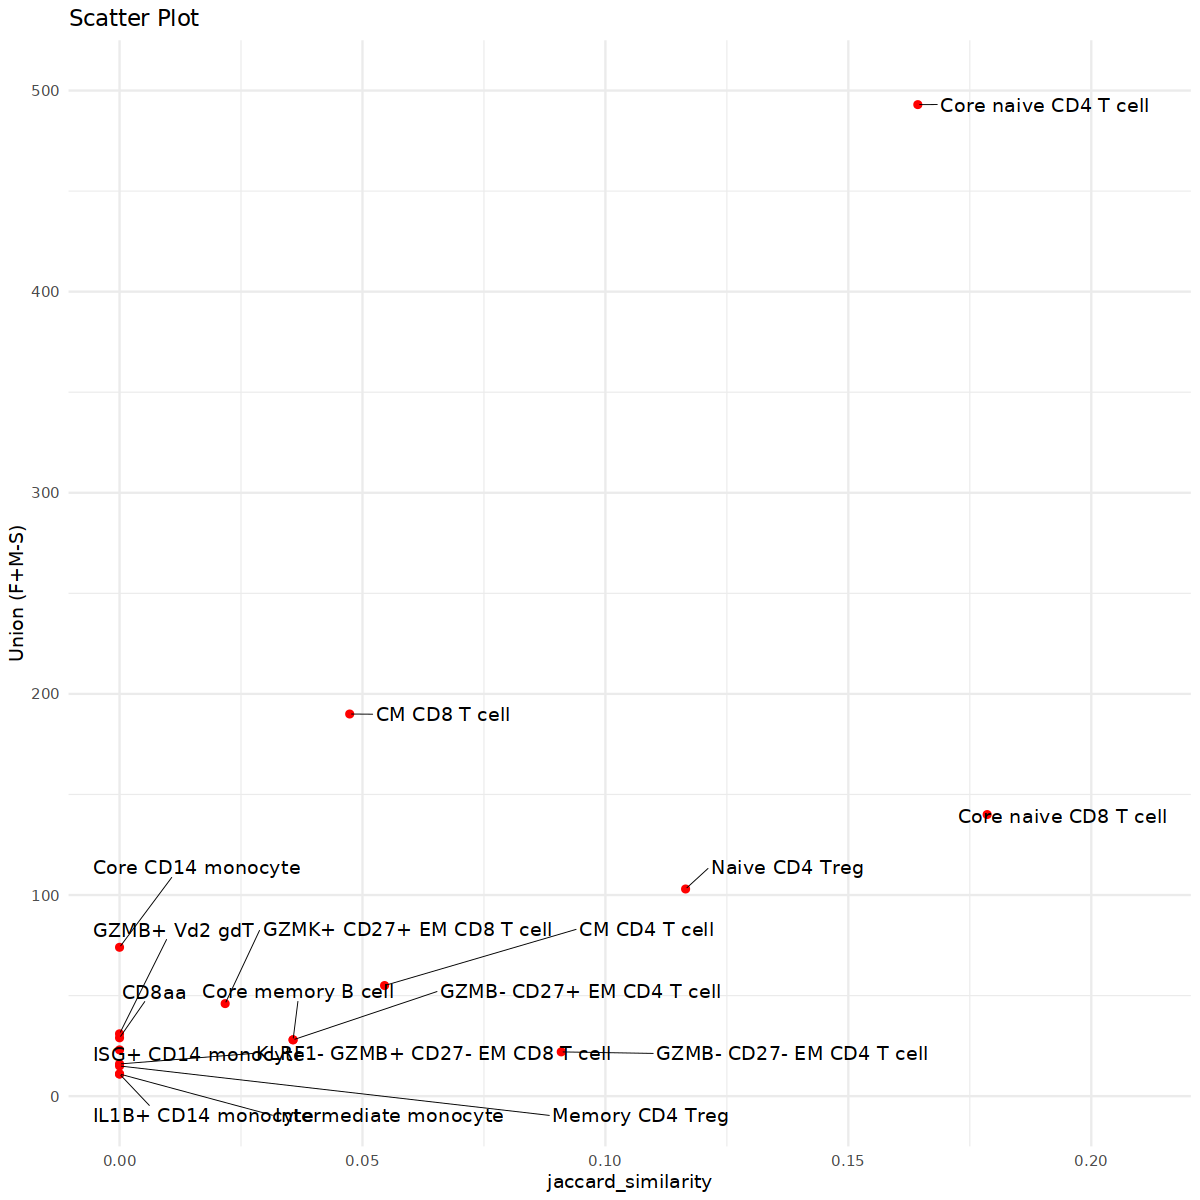

In [8]:
library(ggplot2)
library(ggrepel)

options(repr.plot.width = 10, repr.plot.height = 10)
p1 <- ggplot(new_JI, aes(x = jaccard_similarity, y = Union, label= celltype)) + 
  geom_point(color= "red") +
  guides(colour = guide_legend(override.aes = list(size=4))) +
  #geom_text_repel(max.overlaps=10, size =5)+
  geom_text_repel(data = new_JI,box.padding = 1,force= 0.5,max.overlaps=40,
    nudge_x           = 0,
    hjust             = 0.65,
    segment.size      = 0.2,
   mapping = aes(jaccard_similarity, Union, label = celltype),
   size = 4)+
  theme_classic()+
  theme_minimal()+
  labs(x = "jaccard_similarity", y = "Union (F+M-S)", title = "Scatter Plot")+
  xlim(0, 0.21) + ylim(0, 500)

p1

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


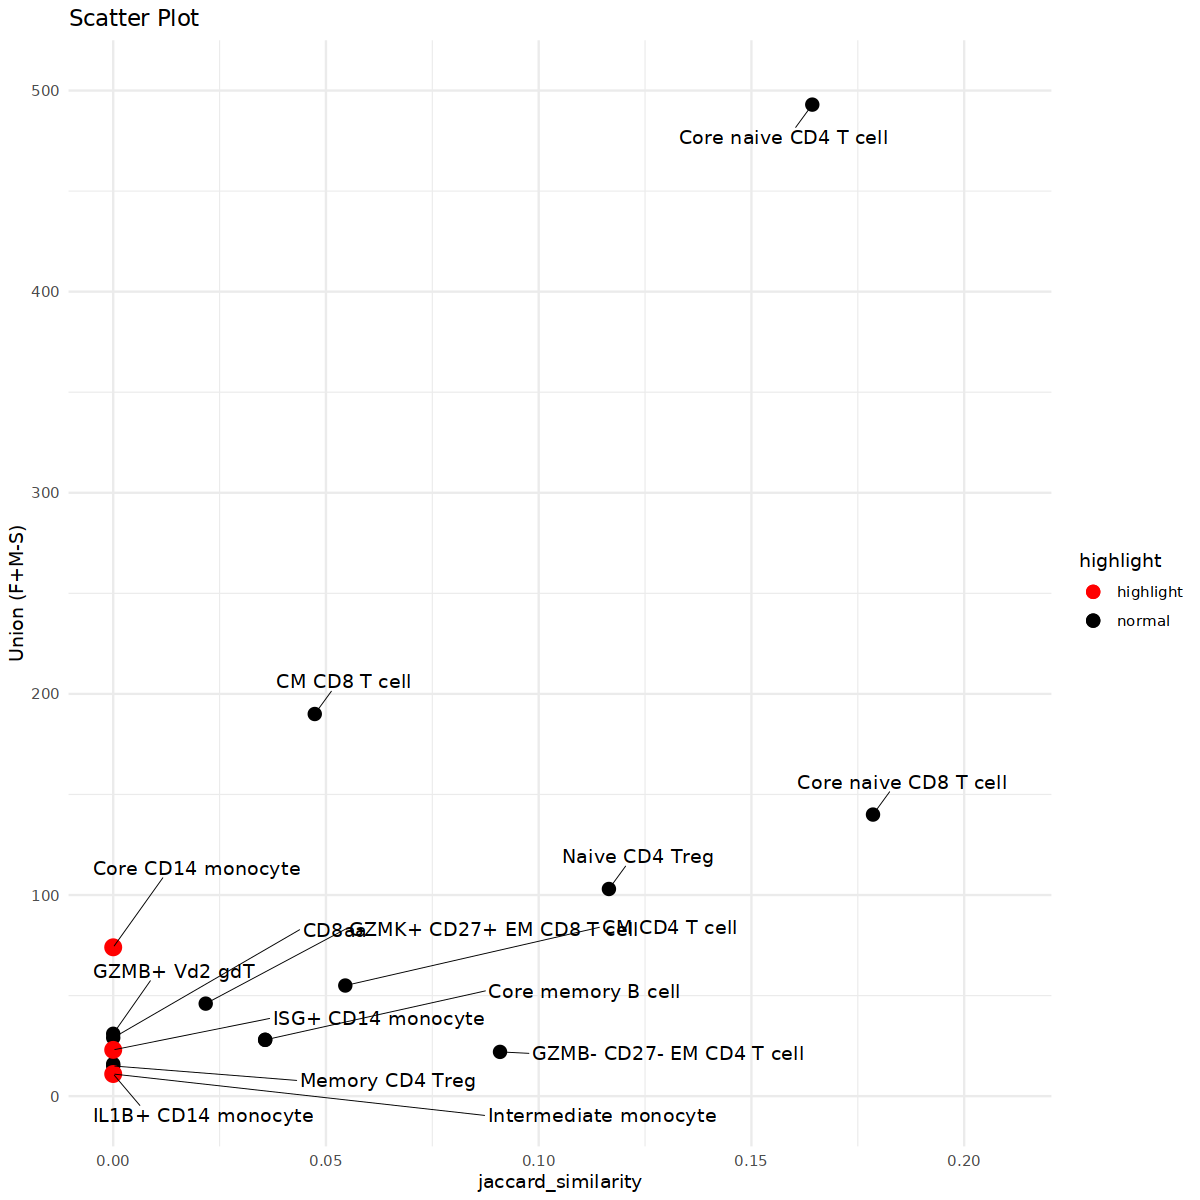

In [27]:
library(ggplot2)
library(ggrepel)

# Create a new column indicating whether the cell type should be highlighted
new_JI$highlight <- ifelse(new_JI$celltype %in% c("Core CD14 monocyte", "IL1B+ CD14 monocyte", "ISG+ CD14 monocyte"), "highlight", "normal")

options(repr.plot.width = 10, repr.plot.height = 10)
p1 <- ggplot(new_JI, aes(x = jaccard_similarity, y = Union, label= celltype)) + 
  # Plot normal points first
  geom_point(data = subset(new_JI, highlight == "normal"), aes(color = highlight), size = 3) +
  # Plot highlighted points last
  geom_point(data = subset(new_JI, highlight == "highlight"), aes(color = highlight), size = 4)+
  scale_color_manual(values = c("highlight" = "red", "normal" = "black")) + # Set color scheme
  guides(color = guide_legend(override.aes = list(size = 3))) +
  geom_text_repel(data = subset(new_JI,),
                  box.padding = 1, 
                  force = 0.5, 
                  max.overlaps = 17,
                  nudge_x = 0, 
                  hjust =0.5, 
                  #vjust=-0.1,
                  segment.size = 0.2,
                  mapping = aes(jaccard_similarity, Union, label = celltype),
                  size = 4) +
  theme_classic() +
  theme_minimal() +
  labs(x = "jaccard_similarity", y = "Union (F+M-S)", title = "Scatter Plot") +
  xlim(0, 0.21) + ylim(0, 500)

p1


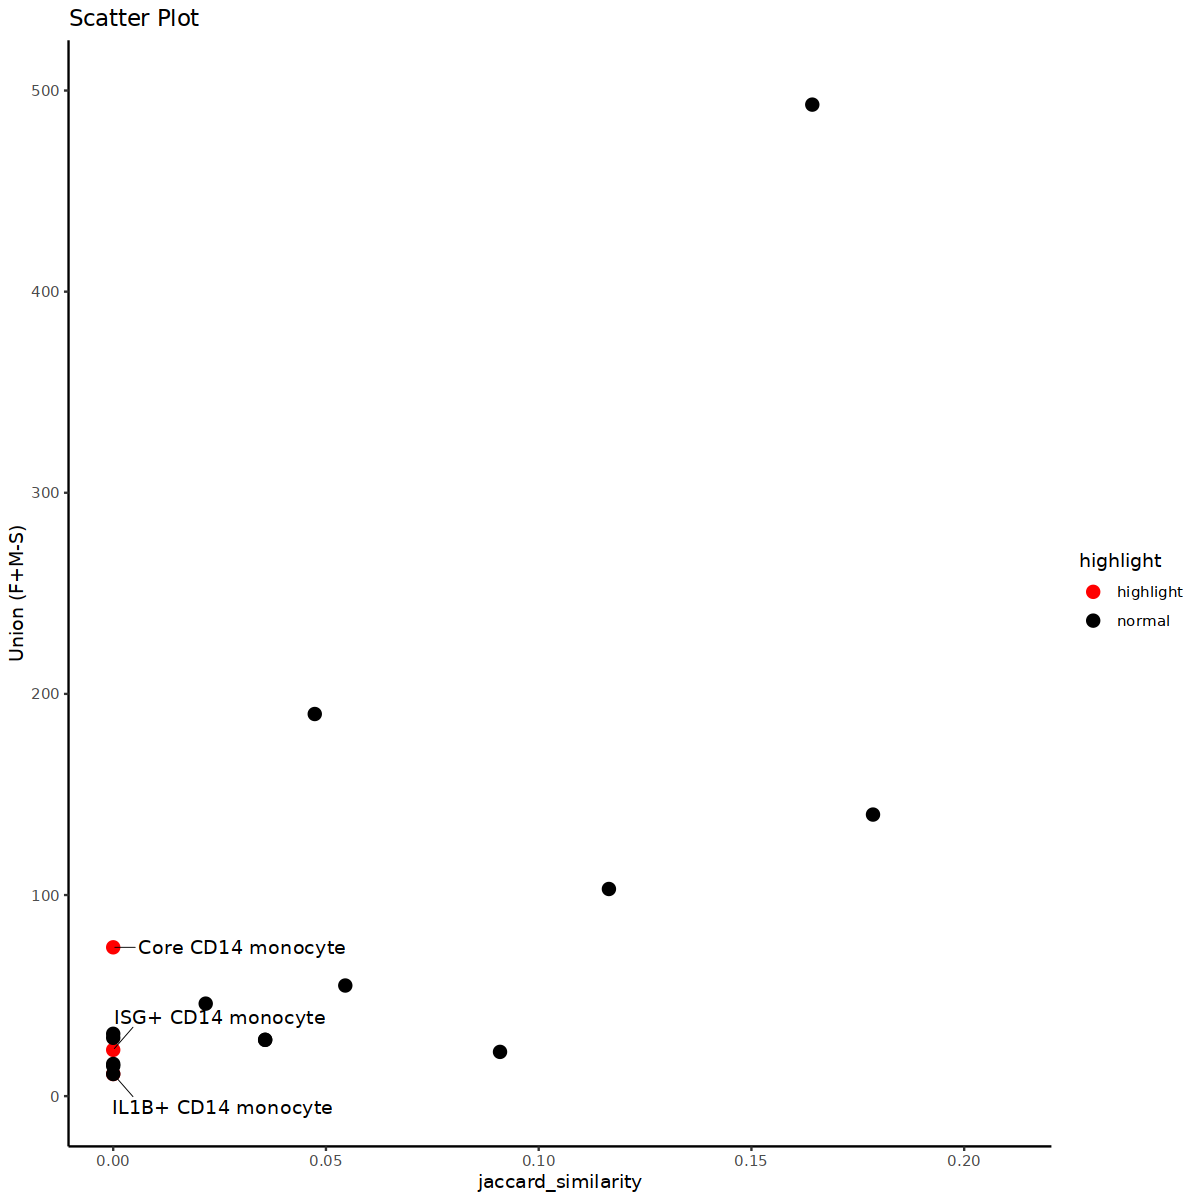

In [10]:
# Create a new column indicating whether the cell type should be highlighted
new_JI$highlight <- ifelse(new_JI$celltype %in% c("Core CD14 monocyte", "IL1B+ CD14 monocyte", "ISG+ CD14 monocyte"), "highlight", "normal")

options(repr.plot.width = 10, repr.plot.height = 10)
p1 <- ggplot(new_JI, aes(x = jaccard_similarity, y = Union, label = celltype)) + 
  # Plot normal points first
  geom_point(data = subset(new_JI, highlight == "normal"), aes(color = highlight), size = 3) +
  # Plot highlighted points last
  geom_point(data = subset(new_JI, highlight == "highlight"), aes(color = highlight), size = 4)
  scale_color_manual(values = c("highlight" = "red", "normal" = "black")) + # Set color scheme
  guides(color = guide_legend(override.aes = list(size = 3))) +
  geom_text_repel(data = subset(new_JI, highlight == "highlight"),
                  box.padding = 1, 
                  force = 0.5, 
                  max.overlaps = 20,
                  nudge_x = 0, 
                  hjust = 0.2, 
                  #vjust = -0.1,
                  segment.size = 0.2,
                  mapping = aes(jaccard_similarity, Union, label = celltype),
                  size = 4) +
  theme_classic() +
  labs(x = "jaccard_similarity", y = "Union (F+M-S)", title = "Scatter Plot") +
  xlim(0, 0.21) + ylim(0, 500)

p1


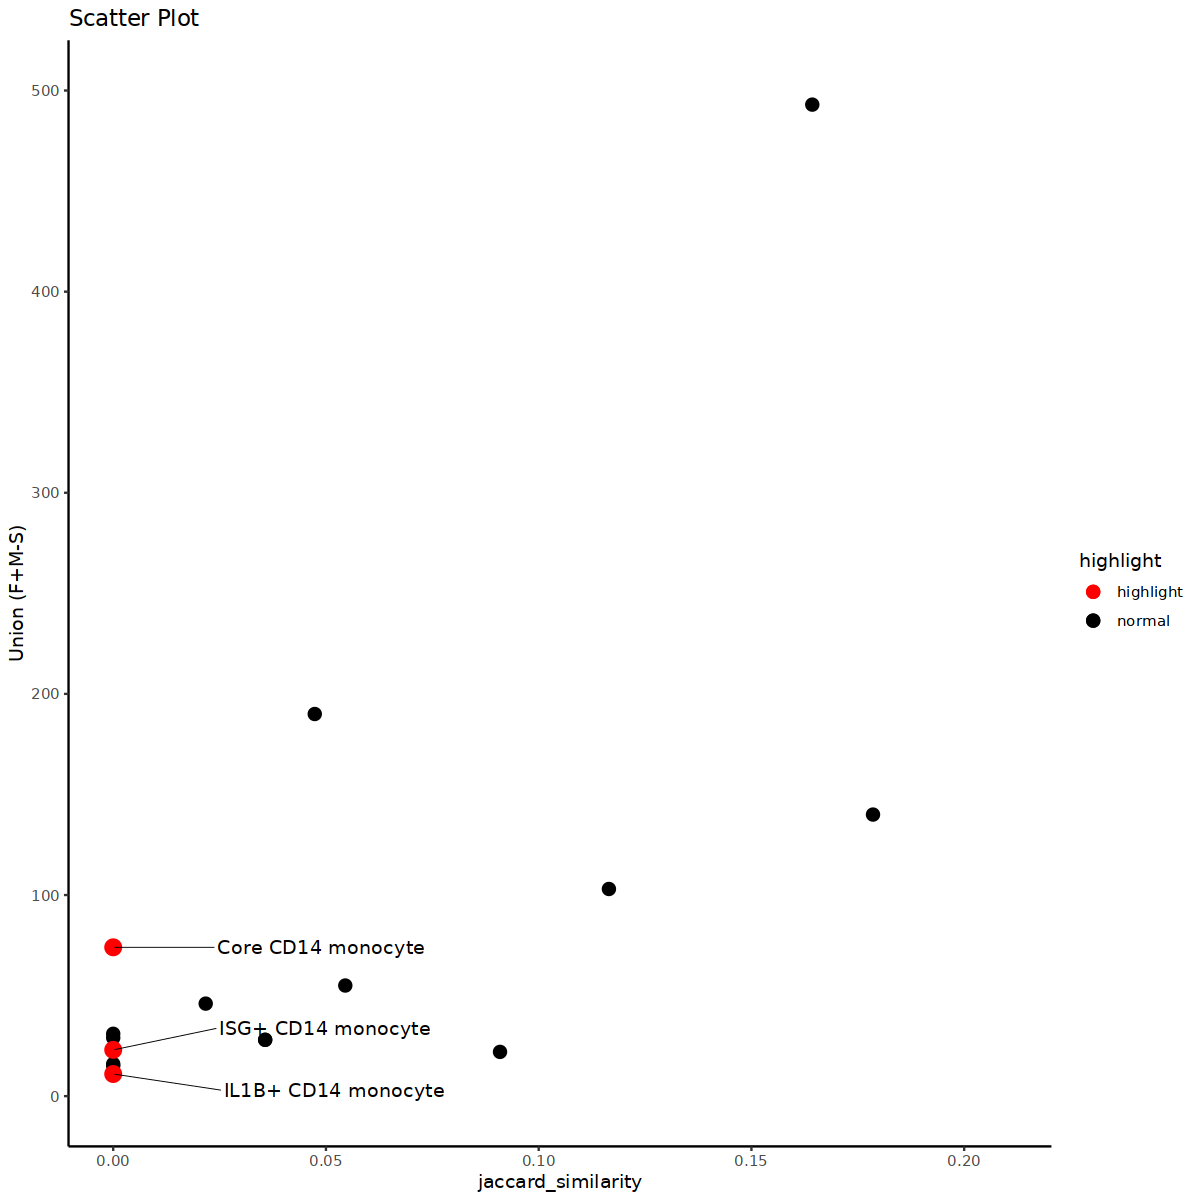

In [14]:
# Create a new column indicating whether the cell type should be highlighted
new_JI$highlight <- ifelse(new_JI$celltype %in% c("Core CD14 monocyte", "IL1B+ CD14 monocyte", "ISG+ CD14 monocyte"), "highlight", "normal")

options(repr.plot.width = 10, repr.plot.height = 10)
p1 <- ggplot(new_JI, aes(x = jaccard_similarity, y = Union)) + 
  # Plot normal points first
  geom_point(data = subset(new_JI, highlight == "normal"), aes(color = highlight), size = 3) +
  # Plot highlighted points last
  geom_point(data = subset(new_JI, highlight == "highlight"), aes(color = highlight), size = 4) +
  scale_color_manual(values = c("highlight" = "red", "normal" = "black")) + # Set color scheme
  guides(color = guide_legend(override.aes = list(size = 3))) +
  geom_text_repel(data = subset(new_JI, highlight == "highlight"),
                  box.padding = 1, 
                  force = 0.5, 
                  max.overlaps = 20,
                  nudge_x = 0, 
                  hjust = -0.5, 
                  #vjust = -0.1,
                  segment.size = 0.2,
                  mapping = aes(jaccard_similarity, Union, label = celltype),
                  size = 4) +
  theme_classic() +
  labs(x = "jaccard_similarity", y = "Union (F+M-S)", title = "Scatter Plot") +
  xlim(0, 0.21) + ylim(0, 500)

p1
